In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [156]:
#Use the titanic data set, perform preprocessing by deal with missing values, drop 
irrelevant attributes.
df=pd.read_csv("train.csv")
df.head(40)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [157]:
df_1=df.drop(columns=['Name','Fare','PassengerId','Ticket','Cabin','Embarked','SibSp','Parch'],axis=1)
df_1.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [158]:
df_1['Age']=df_1['Age'].fillna(df_1['Age'].median())
df_1.head(20)

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
5,0,3,male,28.0
6,0,1,male,54.0
7,0,3,male,2.0
8,1,3,female,27.0
9,1,2,female,14.0


In [159]:
#Use the scikit learn pipelines to perform the preprocessing - standardizing, 
#encoding and model fitting in one step.
x=df_1.drop(columns='Survived',axis=1)
y=df_1['Survived'].values
print(x)
print(y)

le=preprocessing.LabelEncoder()
df_1['Sex']=le.fit_transform(df_1['Sex'])

numeric_attr=list(['Age'])
categoric_ordinal_attr=list(['Pclass'])
categoric_nominal_attr=list(df_1['Sex'])


     Pclass     Sex   Age
0         3    male  22.0
1         1  female  38.0
2         3  female  26.0
3         1  female  35.0
4         3    male  35.0
..      ...     ...   ...
886       2    male  27.0
887       1  female  19.0
888       3  female  28.0
889       1    male  26.0
890       3    male  32.0

[891 rows x 3 columns]
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1

In [160]:
print(df_1.isna().sum())

Survived    0
Pclass      0
Sex         0
Age         0
dtype: int64


In [161]:
# Tabulate using relevant measures of accuracy , Sensitivity and specificity.

ordinal_pipeline = Pipeline([
    ("encoder", OrdinalEncoder())
])

nominal_pipeline = Pipeline([
    ("encoder", OneHotEncoder(sparse=True, handle_unknown="ignore"))
])

numerical_pipeline = Pipeline([
    ("scaler", StandardScaler())
])


In [162]:
preprocessing_pipeline = ColumnTransformer([
    ("nominal_preprocessor", nominal_pipeline, categoric_nominal_attr),
    ("ordinal_preprocessor", ordinal_pipeline, categoric_ordinal_attr),
    ("numerical_preprocessor", numerical_pipeline, numeric_attr)
])


In [163]:
complete_pipeline = Pipeline([
    ("preprocessor", preprocessing_pipeline),
    ("estimator", GaussianNB())
])

cp=complete_pipeline.fit(x, y)

In [164]:
scores = cross_val_score(cp, x, y, cv=5)
scores

array([0.80446927, 0.80337079, 0.78651685, 0.75280899, 0.78651685])

In [165]:
score = cp.score(x, y)
print(score)

0.7867564534231201


In [166]:
y_pred=cp.predict(x)
cm=confusion_matrix(y,y_pred)
print(cm)

[[468  81]
 [109 233]]


In [167]:
accuracy=cm.trace()/cm.sum()
print(accuracy)

0.7867564534231201


In [168]:
senstivity=cm[1][1]/(cm[1][0]+cm[1][1])
print(senstivity)

0.6812865497076024


In [169]:
specificity=cm[0][0]/(cm[0][0]+cm[1][0])
print(specificity)

0.8110918544194108


In [170]:
#Visualize the ROC curve and comment on performance
y_prob=cp.predict_proba(x)[::,1]
fpr,tpr,_=roc_curve(np.squeeze(y),y_prob)
auc=roc_auc_score(y,y_prob)

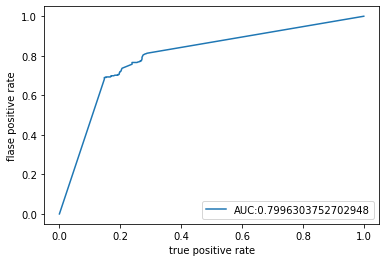

In [171]:
plt.plot(fpr,tpr,label="AUC:"+str(auc))
plt.xlabel('true positive rate')
plt.ylabel('flase positive rate')
plt.legend(loc=4)
plt.show()
